# Mask RCNN

mask rcnn是一个分割算法(实例分割)，可用于：

* 目标检测

* 实例分割

* 关键点检测

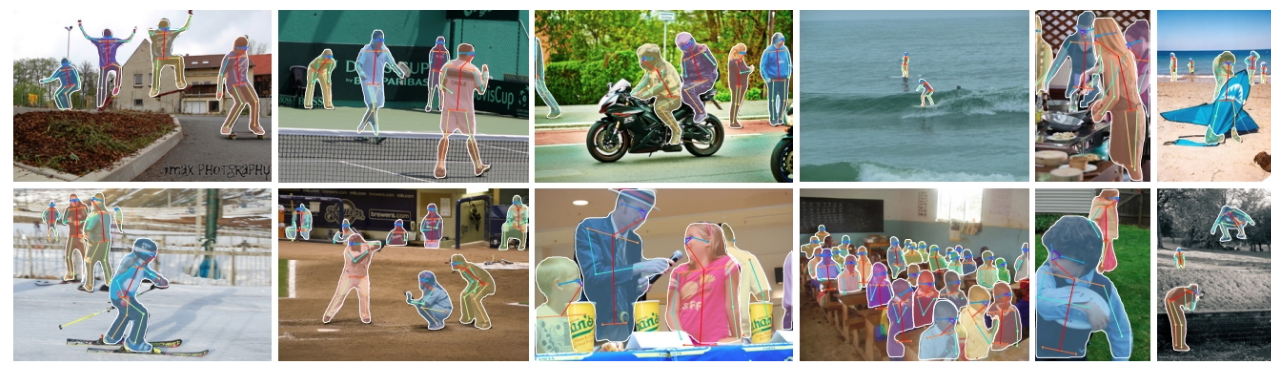

本质上，mask R-CNN是在faster rcnn的基础上，加入了FCN模块，得到最终的分割结果。

## 模型框架

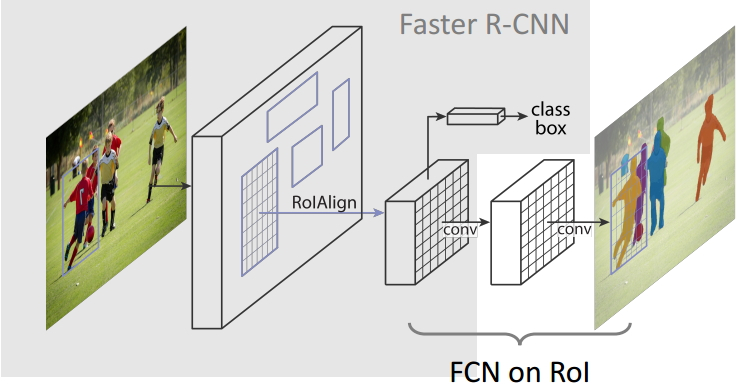

### 改进1: ROI Pooling $\rightarrow$ ROI Align

ROI Pooling的过程较为粗糙，存在两次量化过程，导致最终的定位精度不够精确。

给定一个feature map，得到了若干个Region Proposal

经过筛选后，这些proposal需要映射到feature map上，统一池化成$7\times 7$的尺寸

然而，该过程会发生两次量化误差。

**第一次**： 原图映射到feature map上产生误差。

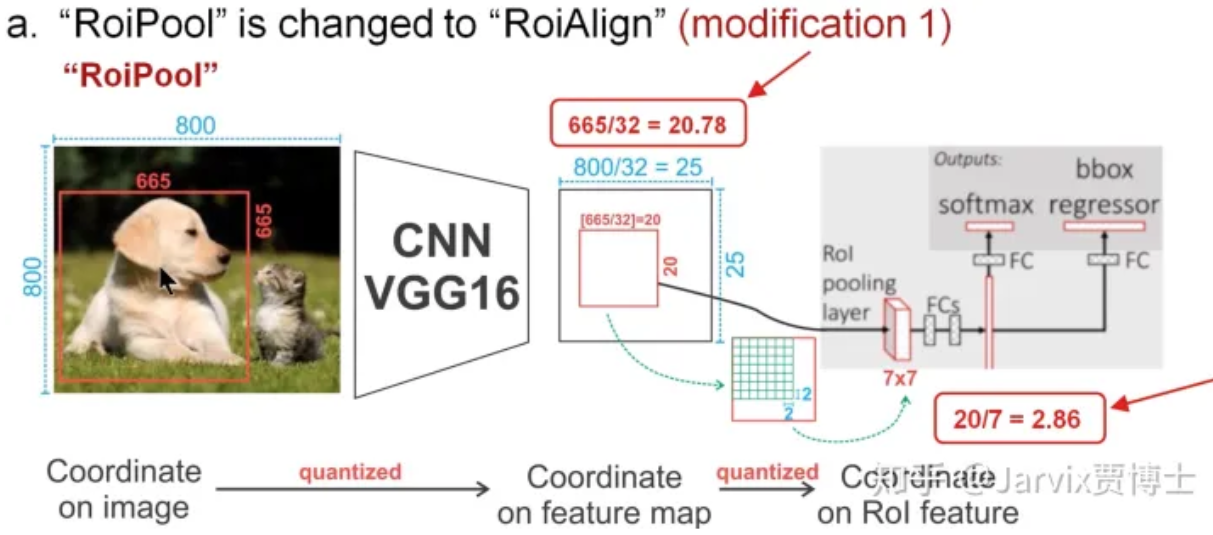

假设一个region尺寸为665，映射到feature map上的时候缩小了32倍。

那么roi pooling选择的就是$20\times 20$的区域。

实际上，理论的尺寸为665/32=20.78， roi pooling将其约等于20，造成了0.78的误差。

$0.78\times32=24.96$，因此造成的bbox的误差约为25个像素。

这对于小目标的尺寸会造成较大误差。

**第二次** 第二次误差来自于池化过程。

roi pooling在池化过程中，将feature按整数切割成若干个同等大小的块，然后分别取max。

也就是说按照整数坐标对图像进行池化。显然，这存在问题。

例如，$20\times 20$的feature进行池化，得到$7\times7$，每个格子的坐标为$2.86\times2.86$

这里取整数显然存在问题。

#### ROI Align

roi align则采用了浮点坐标的方式，来尽量减小量化误差。

其核心思想为：通过浮点数坐标的方式进行计算。虽然在浮点数上没有数值，也可以通过线性插值的方式来得到像素值。

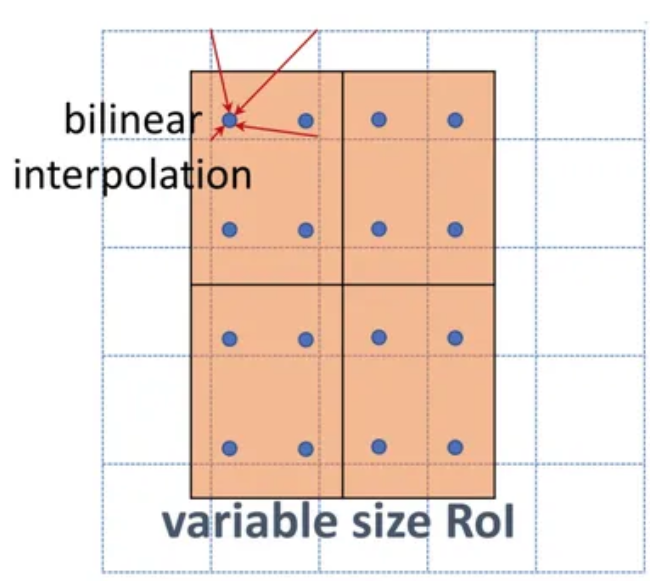

从大图中，找到region的四个角坐标(浮点数)

然后，在此区域将region划分成相等大小的$7\times7$块

在这些块内，每个块产生4个坐标点，通过线性插值的方式来得到像素值。

然后对这些像素值进行池化处理。

### 改进2: FPN

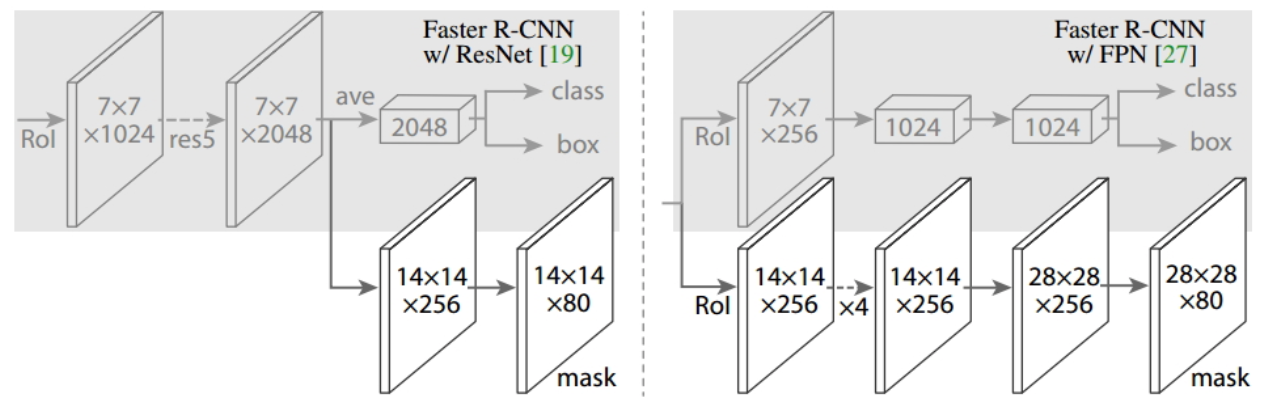

加入了FPN分支

右侧模型输出了更大的尺寸，从而能够获得更加精细的结果。



## 损失函数

$$L = L_{cls} + L_{box} + L_{mask}$$

## 效果展示

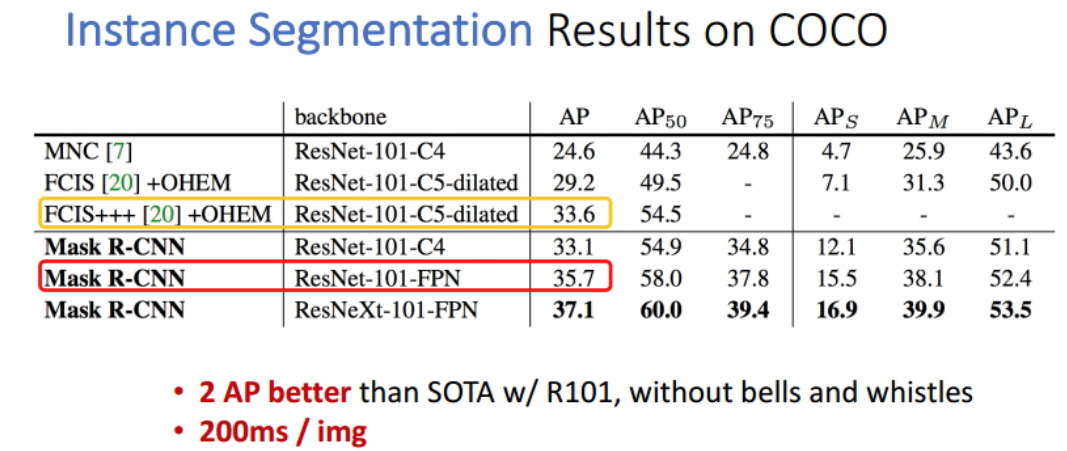

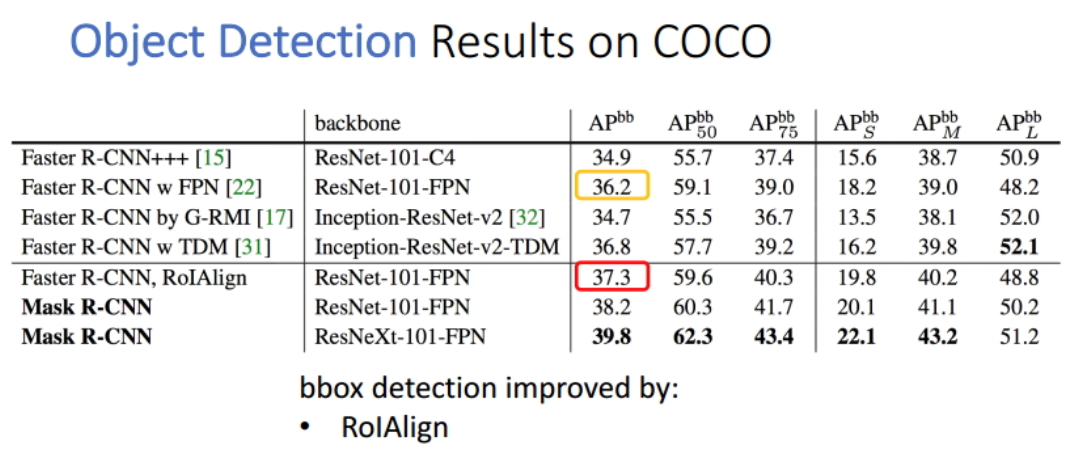

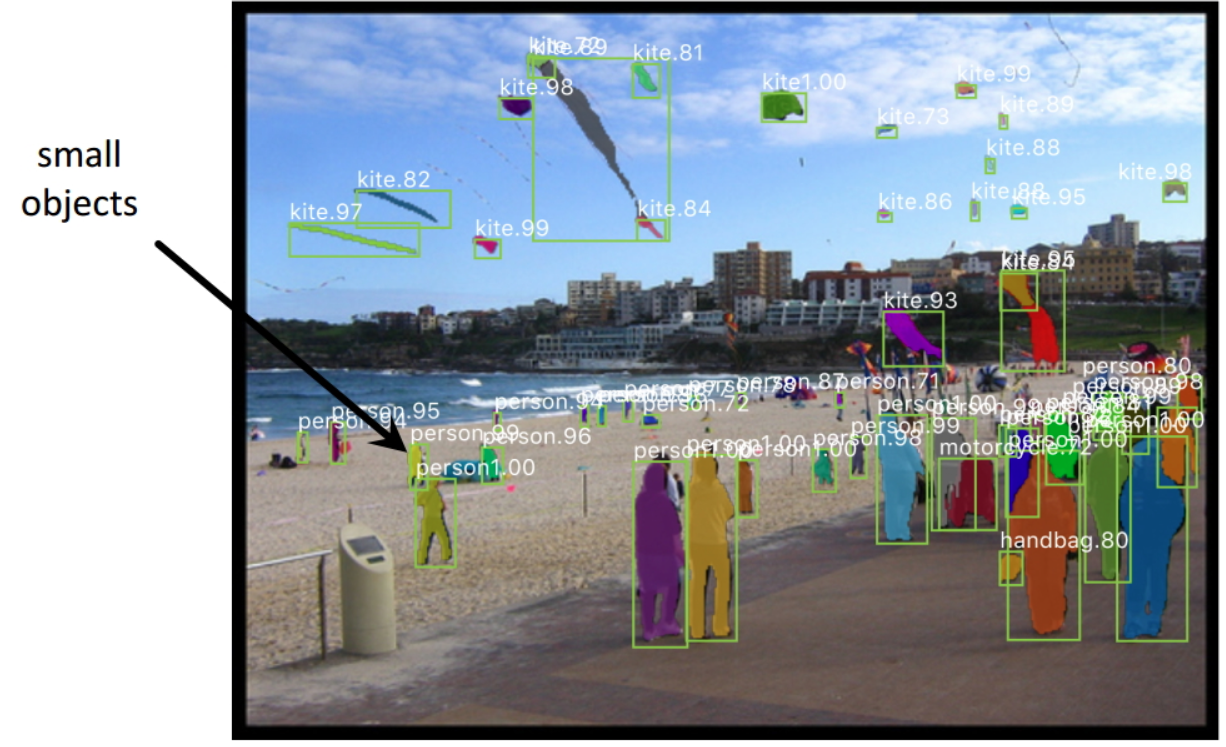

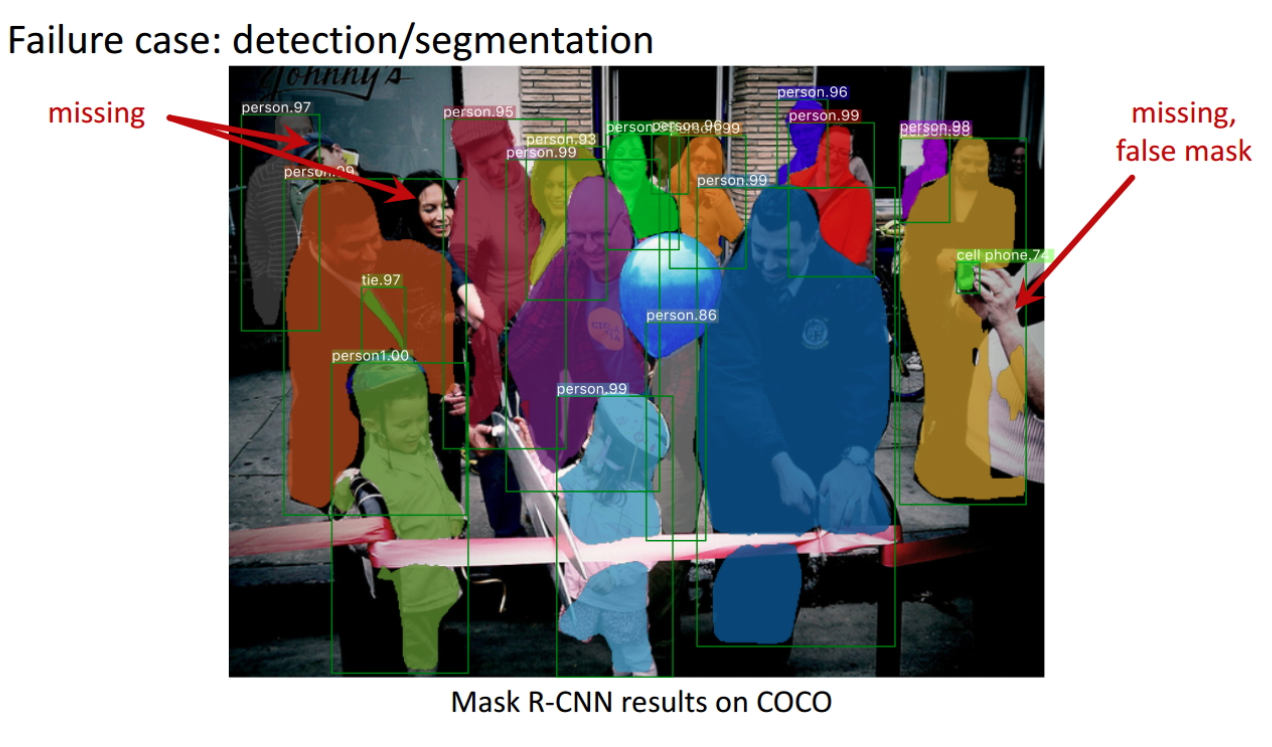